In [ ]:
########### Visualizing dyad. ###########

In [ ]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import skimage
import numpy as np
from typing import List
import random
from tqdm import tqdm
import scipy.io as sio

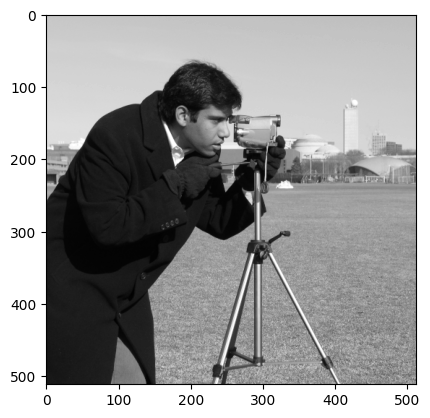

(512, 512), (512,), (512, 512)
(512, 512)


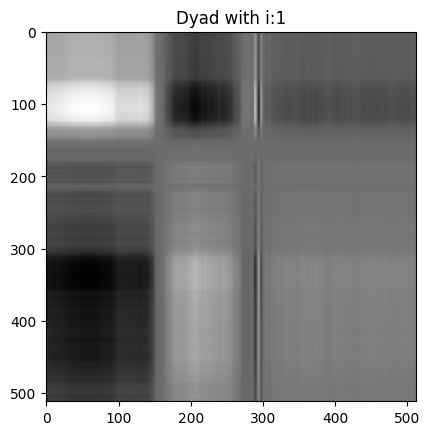

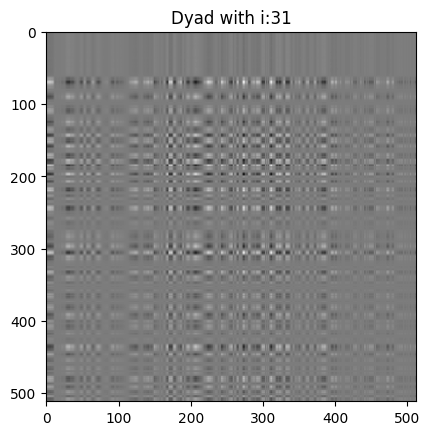

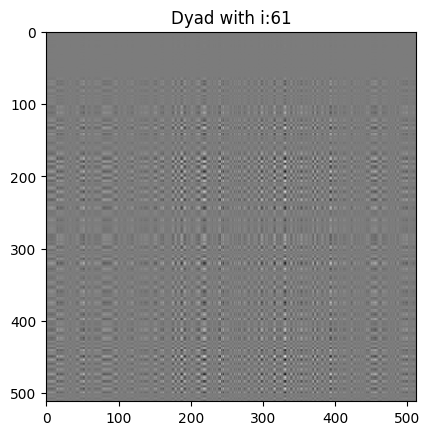

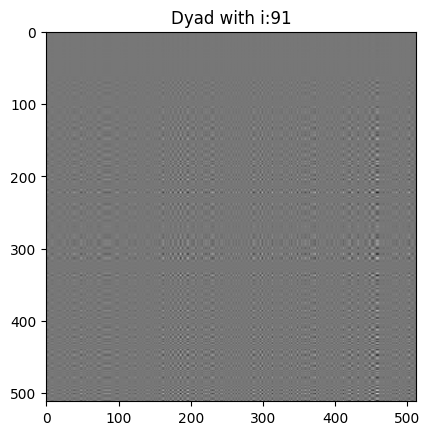

In [ ]:
#### ESERCIZIO 1 ####
img = skimage.data.camera()
plt.imshow(img, cmap="gray")
plt.show()

U, s, VT = np.linalg.svd(img)
print(f"{U.shape}, {s.shape}, {VT.shape}")
S = np.diag(s)
print(S.shape)


"""
Se X è nxm: U deve avere la forma nxn, S nxm e VT mxm così otteniamo nxm come output.
Quindi quando facciamo slicing lasciamo la dimesione originale di righe a U, e la dimensione originale di colonne a VT
in  questo modo continuiamo ad avere in output una matrice nxm.
In questo caso prendiamo solamente i e non :i perchè volgiamo visualizzare solamente il valore del dyad per quello specifico valore
di i e non la sommatoria dei dyad fino a i.
"""
for i in np.arange(1, 100, 30):
  plt.imshow((U[:, i:i+1] @ VT[i:i+1, :]) *S[i, i], cmap="gray")
  plt.title(f'Dyad with i:{ i}')
  plt.show()



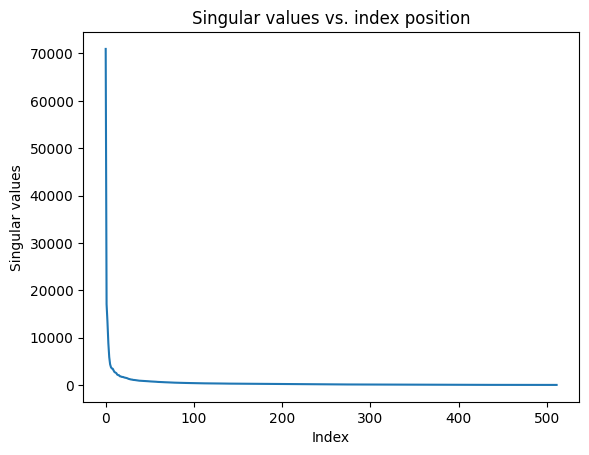

In [ ]:
plt.plot(range(len(s)),s)
plt.title('Singular values vs. index position')
plt.xlabel('Index')
plt.ylabel('Singular values')
plt.show()

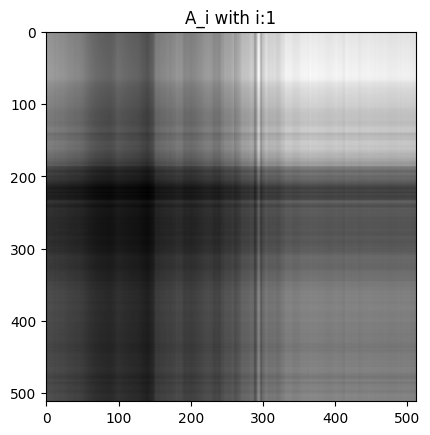

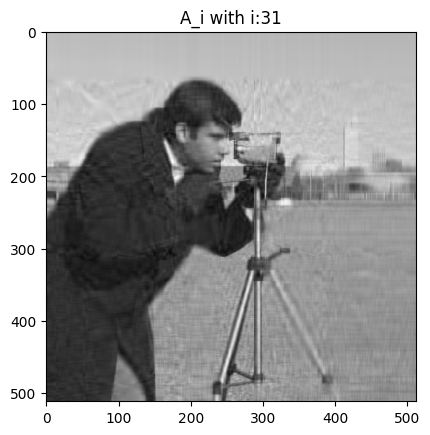

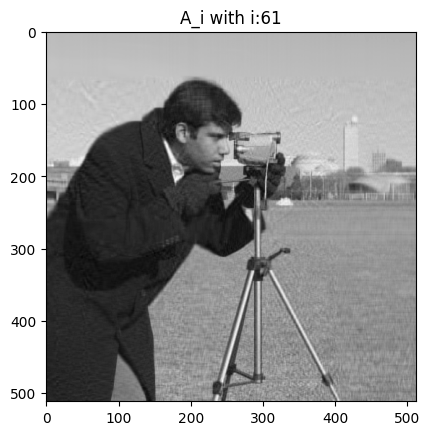

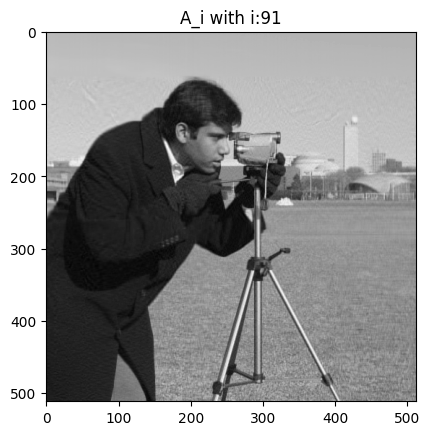

In [ ]:
"""
Se X è nxm: U deve avere la forma nxn, S nxm e VT mxm così otteniamo nxm come output.
Quindi quando facciamo slicing lasciamo la dimesione originale di righe a U, e la dimensione originale di colonne a VT
in  questo modo continuiamo ad avere in output una matrice nxm.
"""
for i in np.arange(1, 100, 30):
  plt.imshow(U[:, :i] @ S[:i, :i] @ VT[:i, :], cmap="gray")
  plt.title(f'A_i with i:{ i}')
  plt.show()

512 512


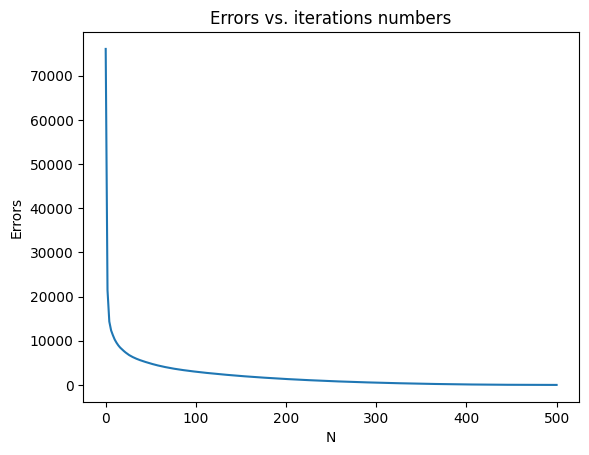

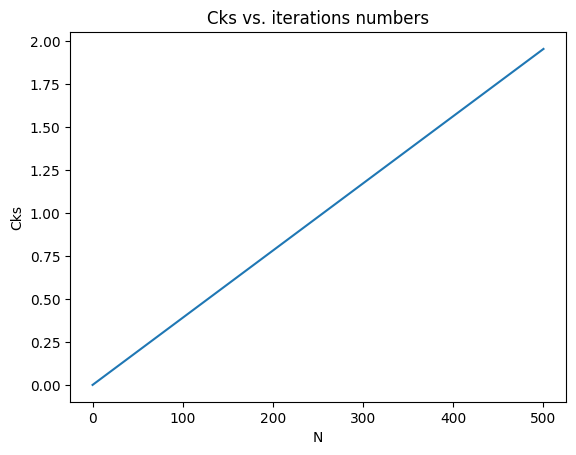

In [ ]:
nums = np.arange(0, 501, 2)
errs, cks = [], []
n, m = img.shape
print(m, n)
for k in nums:
  X_k = U[:, :k] @ S[:k, :k] @ VT[:k, :]
  errs.append(np.linalg.norm((img - X_k), 'fro'))
  # Fattore di compressione
  cks.append((k*(m + n + 1) / (m*n)))
plt.plot(nums, errs)
plt.title('Errors vs. iterations numbers')
plt.xlabel('N')
plt.ylabel('Errors')
plt.show()

plt.plot(nums, cks)
plt.title('Cks vs. iterations numbers')
plt.xlabel('N')
plt.ylabel('Cks')
plt.show()

In [ ]:
########### Classification of MNIST Digits with SVD Decomposition. ###########

In [ ]:
data = sio.loadmat('MNIST.mat')

In [ ]:
label = data['I']
print(type(label))
x_data = data['X']
print(type(x_data))
print(x_data.shape, label.shape)
numbers = [1, 7]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(256, 1707) (1, 1707)


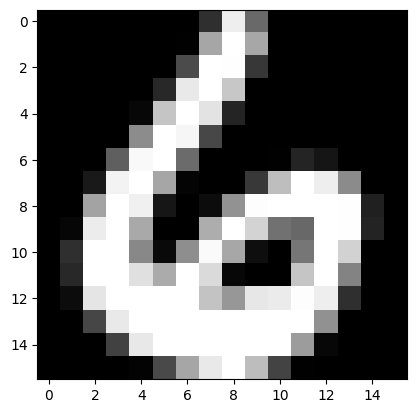

In [ ]:
def visualize_vector(vec):
  img = vec.reshape(16, 16)
  plt.imshow(img, cmap="gray")
visualize_vector(x_data[:, 0])

In [ ]:
"""
  Given a dataset x of feature, a dataset y of labels and a list of integers
  the function return a dataset y containing only labels equals to the integer
  present in the list and their corresponding feature.
"""
def filter_data(x, y, filter: List[int]):
  y = y.ravel() # Return a contiguous flattened array.

  # Create a boolean mask for rows where y is 3 or 4
  mask = False
  for elem in filter:
    mask = mask | (y == elem)

  # Use the mask to filter x and y
  filtered_x = x[:, mask]
  filtered_y = y[mask]

  # If you want to reshape filtered_y back to (1, N) where N is the number of selected rows
  filtered_y = filtered_y.reshape(1, -1)

  print(filtered_x.shape, filtered_y.shape)
  return filtered_x, filtered_y

fil_x, fil_y = filter_data(x_data, label, numbers)
print(np.unique(fil_y))

(256, 340) (1, 340)
[1 5]


In [ ]:
def split_dataset(x_dataset, label_dataset, train_rateo):
  dataset = np.concatenate((x_dataset, label_dataset), axis=0)
  train_split = int(len(dataset[0])*train_rateo)
  return dataset[:, :train_split][:-1], dataset[:, :train_split][-1], dataset[:, train_split:][:-1], dataset[:, train_split:][-1]
x_train, y_train, x_test, y_test = split_dataset(fil_x, fil_y, 0.8)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(np.unique(y_test))

(256, 272) (272,) (256, 68) (68,)
[1. 5.]


In [ ]:
"""
  Given a dataset x of feature, a dataset y containing N unique labels and an
  integer train_rateo 0<=train_rateo<=1 the function return a list of N dataset
  x,y each containing only one unique label.
"""
def separate_dataset(x, y):
  unique = np.unique(y)
  y = y.ravel()
  mask_list, c_list, yc_list = [], [], []
  for n in unique:
    mask_list.append(y == n)

  for mask in mask_list:
    c_list.append(x[:, mask])
    yc_list.append(y[mask].reshape(1, -1))

  #for i in range(len(unique)):
  #  print(c_list[i].shape, yc_list[i].shape)

  return c_list, yc_list

c_list, y_list = separate_dataset(x_train, y_train)

In [ ]:
def classify_digit(c_list, y, target, c_label):
  dist_list = []

  for c in c_list:
    U = np.linalg.svd(c, full_matrices=False)[0]
    y_orto = U@(U.T@y)
    dist_list.append(np.linalg.norm(y - y_orto, 2))

  res = c_label[np.argmin(dist_list)]

  #print(y, res)
  if res == target:
    return True
  else:
    return False

correct = 0
for i in tqdm(range(len(x_test[0]))):
  if classify_digit(c_list, x_test[:, i].T, y_test[i], np.unique(y_test)):
    correct += 1
print()
print(f"Accuracy: {correct/len(xk.T)}")

100%|██████████| 68/68 [00:01<00:00, 54.14it/s]


0.9411764705882353


In [ ]:
####### Clustering with PCA #######

In [ ]:
df = pd.read_csv(r'sample_data/mnist_test.csv')
display(df)
df = df.to_numpy().T
#plt.imshow(df.head(1).drop('7', axis=1).to_numpy().reshape(28, 28))

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X, Y = df[1:], df[:1]
print(X.shape, Y.shape)

(784, 9999) (1, 9999)


In [ ]:
x, y = filter_data(X, Y, numbers)

(784, 2162) (1, 2162)


In [ ]:
x_train, y_train, x_test, y_test = split_dataset(x, y, 0.8)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 1729) (1729,) (784, 433) (433,)


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 1729) (1729,) (784, 433) (433,)


In [ ]:
def centroid(data):
  return data.mean(axis=1)

In [ ]:
def pca(data, k=2):
  Xc = (data.T - centroid(data)).T # traspongo data.T e rifaccio .T per rimettere in forma originale
  print(Xc.shape)
  U, _, _ = np.linalg.svd(Xc, full_matrices=False)
  Zk = U[:, :k].T @ Xc
  print(f"New shape of data: {Zk.shape}")
  return Zk

In [ ]:
def get_mean_distance(data, point):
  dist = []
  for item in data.T:
    dist.append(np.linalg.norm(item - point[:, np.newaxis], 2))
  return np.mean(dist)

(784, 1729)
New shape of data: (2, 1729)
(784, 433)
New shape of data: (2, 433)
Average distance of cluster 1 from centroid: 1280.7065198284424
Average distance of cluster 1 from test centroid: 1386.1145909411011

Average distance of cluster 7 from centroid: 1270.8129563655866
Average distance of cluster 7 from test centroid: 1172.7017935025249



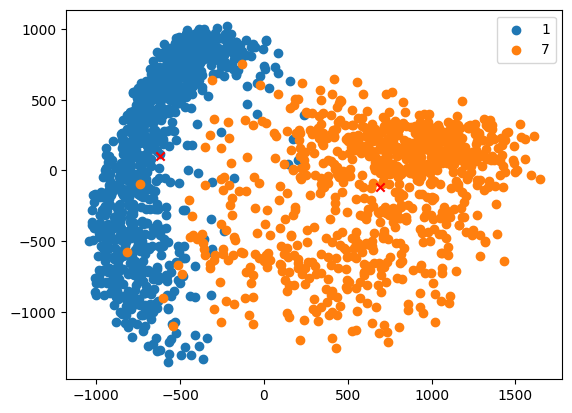

In [ ]:
unique_labels = np.unique(y_train)
# Calcolo pca per train e test riducendoli a 2 feature
Zk = pca(x_train)
Zk_test = pca(x_test)


x_list, y_list = separate_dataset(Zk, y_train)
x_test_list, y_test_list = separate_dataset(Zk_test, y_test)

# Calcolo la posizione dei centroidi per ogni cluster nel train
centroid_list = [centroid(x) for x in x_list]

# Create a scatter plot for each unique label
for label, subdata, c, subdata_test in zip(unique_labels, x_list, centroid_list, x_test_list):
    mask = (y_train == label)
    plt.scatter(Zk[0, mask], Zk[1, mask], label=f'{str(label)[0]}')
    plt.scatter(c[0], c[1], marker='x', color='red')

    # Calcolo la distanza tra il cluster e il centroide di quel cluster
    distance = get_mean_distance(subdata, c)
    distance_test = get_mean_distance(subdata_test, c)
    print(f"Average distance of cluster {str(label)[0]} from centroid: {distance}")
    print(f"Average distance of cluster {str(label)[0]} from test centroid: {distance_test}", end='\n\n')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [ ]:
xk = pca(x_test)
lables = np.unique(y_test)
print(lables)

#Calcolo il centroide dei cluseter nel test set, sarebbe corretto utilizzare
# i centroidi calcolati sul train altrimenti non ha senso utilizzare il train set
# e parlare di training
#centroid_list = [centroid(x) for x in x_test_list]

correct = 0
for i in range(len(xk.T)):
  distances = [np.linalg.norm(xk[:, i] - c, 2) for c in centroid_list]
  res = lables[np.argmin(distances)]
  if res == y_test[i]:
    correct += 1

print(f"Accuracy: {correct/len(xk.T)}")

(784, 433)
New shape of data: (2, 433)
[1 7]
Accuracy: 0.9237875288683602


(784, 1729)
New shape of data: (3, 1729)
(784, 433)
New shape of data: (3, 433)
Average distance of cluster 1 from centroid: 1702.9022610031677
Average distance of cluster 1 from test centroid: 1860.4946286781378

Average distance of cluster 7 from centroid: 1761.1928614277356
Average distance of cluster 7 from test centroid: 1844.2182140543518



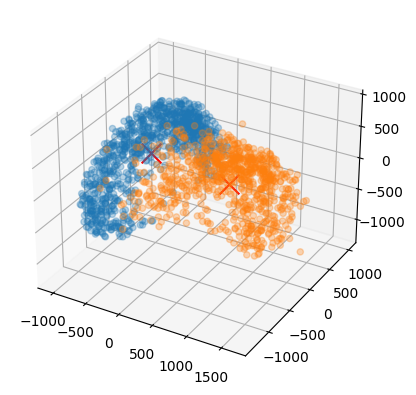

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Calcolo pca per train e test riducendoli a 3 feature
unique_labels = np.unique(y_train)
Zk = pca(x_train, 3)
Zk_test = pca(x_test, 3)

x_list, y_list = separate_dataset(Zk, y_train)
x_test_list, y_test_list = separate_dataset(Zk_test, y_test)

# Calcolo il centroide per ogni cluster del train set, shape (3,) visto che è calcolato su dati a 3 feature
centroid_list = [centroid(x) for x in x_list]

# Create a scatter plot for each unique label
for label, subdata, c, subdata_test in zip(unique_labels, x_list, centroid_list, x_test_list):
    mask = (y_train == label)
    ax.scatter(Zk[0, mask], Zk[1, mask], Zk[2, mask], label=f'{str(label)[0]}', alpha=0.3)
    ax.scatter(c[0], c[1], c[2], marker='x', color='red', s=200, alpha=1.0)

    # Calcolo la distanza tra il cluster e il centroide di quel cluster
    distance = get_mean_distance(subdata, c)
    distance_test = get_mean_distance(subdata_test, c)
    print(f"Average distance of cluster {str(label)[0]} from centroid: {np.mean(distance)}")
    print(f"Average distance of cluster {str(label)[0]} from test centroid: {np.mean(distance_test)}", end='\n\n')

In [ ]:
xk = pca(x_test, 3)
lables = np.unique(y_test)
print(lables)

#Calcolo il centroide dei cluseter nel test set, sarebbe corretto utilizzare
# i centroidi calcolati sul train altrimenti non ha senso utilizzare il train set
# e parlare di training
#centroid_list = [centroid(x) for x in x_test_list]

correct = 0
for i in range(len(xk.T)):
  distances = [np.linalg.norm(xk[:, i] - c, 2) for c in centroid_list]
  res = lables[np.argmin(distances)]
  if res == y_test[i]:
    correct += 1

print(f"Accuracy: {correct/len(xk.T)}")

(784, 433)
New shape of data: (3, 433)
[1 7]
Accuracy: 0.9214780600461894
